# **PreViaje**

## Integrantes Grupo 5:

*   Marcia Millan
*   Daiana Zarallo
*   Gabriela Velasquez
*   Silvana Fernandez
*   Sol Zito







## Presentación del tema

PreViaje es un programa del Ministerio de Turismo y Deportes de la Nación que devuelve el 50% de los gastos en crédito para usar en toda la cadena turística del país a quienes compraron anticipadamente sus escapadas,está destinado a impulsar la recuperación de la actividad turística, la cual se vio afectada por la pandemia (COVID 19) en el año 2020,por el momento se llevaron al cabo  por el momento cinco ediciones del programa.



Edicion 1- enero- diciembre del 2021

Edicion 2- noviembre-diciembre del 2022

Edicion 3- octubre- diciembre del 2022

Edicion 4- mayo- agosto del 2023

Edicion 5- septiembre- octubre del 2023



## Objetivos del Proyecto

* ¿Las personas beneficiarias del programa fueron mas hombres o mujeres?
* ¿ Cual fue la provincia, que registro mas personas beneficiarias?
* ¿Cual de las 5 ediciones de previaje , registro mayor personas beneficiarias?


## Origen del Dataset

El dataset se obtuvo del sitio oficial https://datos.gob.ar/dataset/turismo-previaje


## Descripción del Dataset

El dataset que vamos a utilizar es de personas_beneficiarias,el cual se compone de 5 columnas las cuales son provincia, tramo_edad, genero, personas beenficiaras y edicion ademas de 1020 filas, sin datos nulos.
Para comenzar decidimos trabajar con esta base de datos, para poder tener conocimiento sobre el numero de personas que hicieron uso de este programa, ademas de que adicionalmente tambien podemos ver cual fue la provincia de origen que mas eligio este programa.
No podemos decir con certeza cual fue la razon por la cual las personas beneficiarias, elegieron hacer uso de este programa pudieron ser razones economicas, siemplemente por razones turisticas, o porque se dio a conocer en varios medios, aun asi con esta simple base de datos se puede concluir que si repercutio en el turismo Argentino.  

## Análisis y Exploración del Dataset


###Importar las librerías que vamos a usar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Leemos los archivos

In [3]:
pb=pd.read_csv('personas_beneficiarias.csv')

###Análisis del dataset: **Personas Beneficiaras**

####Análisis básico para conocer las columnas y el shape del dataframe

In [4]:
#Análisis básico para conocer las columnas y el shape de df
pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   provincia               1021 non-null   object
 1   tramo_edad              1021 non-null   object
 2   genero                  1021 non-null   object
 3   personas_beneficiarias  1021 non-null   int64 
 4   edicion                 1021 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.0+ KB


El dataset cuenta con 5 columnas y 1020 filas. No ha datos nulos.

#### Primeras cinco filas

In [5]:
#Imprimimos las primeras 5 filas
pb.head()

,provincia,tramo_edad,genero,personas_beneficiarias,edicion
0,Chaco,18 a 29,Femenino,215,previaje 1
1,Chaco,30 a 44 años,Femenino,478,previaje 1
2,Chaco,45 a 59 años,Femenino,238,previaje 1
3,Chaco,60 años y más,Femenino,103,previaje 1
4,Chaco,18 a 29,Masculino,179,previaje 1


#### División de grupos de cada columna



In [6]:
#Vemos cuál es la división de grupos para cada una de las columnas.
print(f'Las provincias registradas son: {pb.provincia.unique()}')
print (f'Los grupos de edades registrados son: {pb.tramo_edad.unique()}')
print(f'Los géneros registrados son: {pb.genero.unique()}')
print(f'Las ediciones de previaje resgistradas son: {pb.edicion.unique()}')

Las provincias registradas son: ['Chaco' 'Salta' 'Santiago del Estero' 'Tucumán' 'Santa Cruz'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' 'Río Negro'
 'Neuquén' 'La Pampa' 'Chubut' 'La Rioja' 'Corrientes' 'Mendoza'
 'San Juan' 'San Luis' 'Buenos Aires' 'Ciudad Autónoma de Buenos Aires'
 'Entre Ríos' 'Formosa' 'Misiones' 'Santa Fe' 'Córdoba' 'Catamarca'
 'Jujuy']
Los grupos de edades registrados son: ['18 a 29' '30 a 44 años' '45 a 59 años' '60 años y más']
Los géneros registrados son: ['Femenino' 'Masculino' 'X']
Las ediciones de previaje resgistradas son: ['previaje 1' 'previaje 2' 'previaje 3' 'previaje 4' 'previaje 5']


####Agrupacion de personas beneficiadas para cada provincia, grupo de edad, género y edición de previaje

In [7]:
#Vemos cuantas personas fueron beneficiadas para cada provincia, grupo de edad, género y edición de previaje
pb_grupos = pb.groupby(['provincia', 'tramo_edad', 'genero', 'edicion']).sum().reset_index()
pb_grupos


,provincia,tramo_edad,genero,edicion,personas_beneficiarias
0,Buenos Aires,18 a 29,Femenino,previaje 1,11651
1,Buenos Aires,18 a 29,Femenino,previaje 2,66814
2,Buenos Aires,18 a 29,Femenino,previaje 3,13240
3,Buenos Aires,18 a 29,Femenino,previaje 4,16634
4,Buenos Aires,18 a 29,Femenino,previaje 5,11645
...,...,...,...,...,...
1016,Tucumán,60 años y más,Masculino,previaje 2,1785
1017,Tucumán,60 años y más,Masculino,previaje 3,650
1018,Tucumán,60 años y más,Masculino,previaje 4,609
1019,Tucumán,60 años y más,Masculino,previaje 5,404


####Provincias con mayor cantidad de beneficiados

In [8]:
#Vemos cuales fueron las provincias con mayor cantidad de beneficiados
pb_total_por_provincia = pb.groupby('provincia')['personas_beneficiarias'].sum().reset_index()
pb_total_por_provincia=pb_total_por_provincia.sort_values(by='personas_beneficiarias', ascending=False)

In [9]:
pb_total_por_provincia

,provincia,personas_beneficiarias
0,Buenos Aires,1037362
4,Ciudad Autónoma de Buenos Aires,529265
20,Santa Fe,263485
6,Córdoba,244468
12,Mendoza,104769
23,Tucumán,56401
7,Entre Ríos,52898
15,Río Negro,36973
14,Neuquén,33928
16,Salta,31491


###Visualizaciones

#### Cinco provincias más beneficiadas

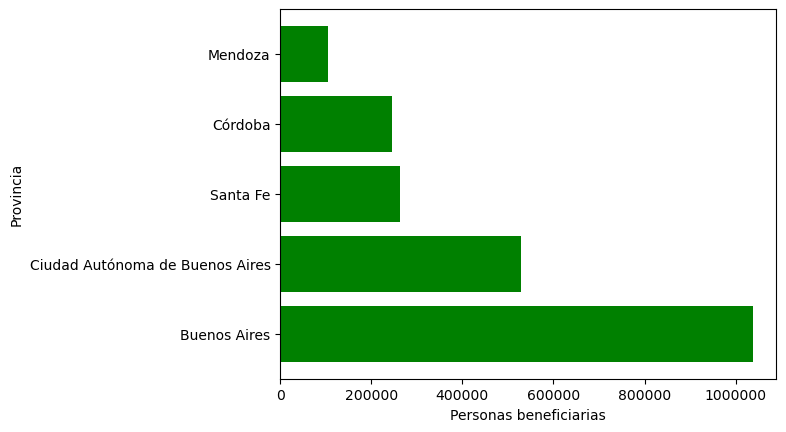

In [15]:
#Graficamos las 5 provincias más beneficiadas
prov_grafico=pb_total_por_provincia.head()
x= prov_grafico['personas_beneficiarias'].astype(int)
y=prov_grafico['provincia']
plt.barh(y,x, color= 'green')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel("Personas beneficiarias")
plt.ylabel("Provincia")

plt.show()


La provincia con el mayor número de beneficiarios es la Ciudad Autónoma de Buenos Aires.
La provincia con el menor número de beneficiarios es Mendoza.

####Beneficios por género

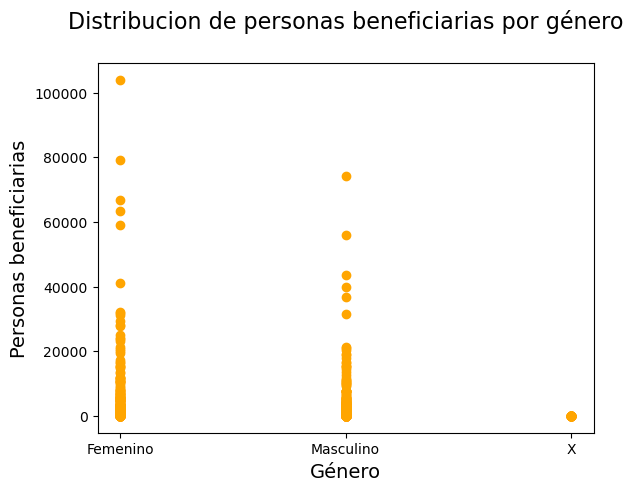

In [12]:
#Graficamos los beneficios por género.
plt.scatter(x=pb['genero'],y=pb['personas_beneficiarias'], color="orange")
plt.ylabel("Personas beneficiarias", size=14)
plt.xlabel("Género", size=14)
plt.title("Distribucion de personas beneficiarias por género", size=16, pad=25)
plt.show()

Las personas que mas utilizaron este beneficio fue el género femenino con una cifra superior a las 100000 personas, siguiendole el género masculino con una cifra aproximada de 79000 personas. Y por último una persona que no detallo su género.

####Beneficiarios por edición

Text(0, 0.5, 'Personas beneficiarias')

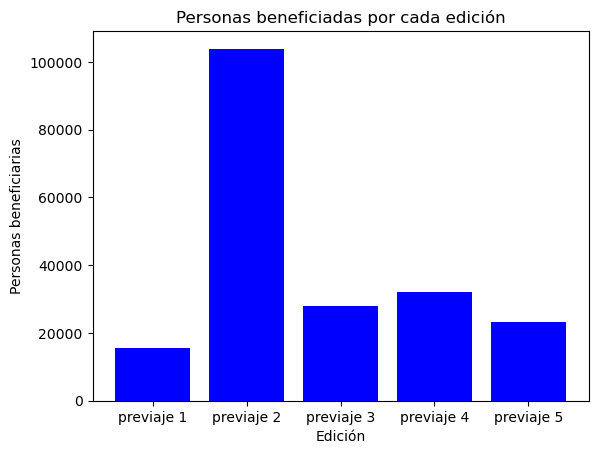

In [13]:
x=pb['edicion']
y=pb['personas_beneficiarias']
plt.bar(x,y,color="blue")
plt.title("Personas beneficiadas por cada edición")
plt.xlabel("Edición")
plt.ylabel("Personas beneficiarias")

El programa Previaje ha tenido un impacto significativo en el turismo argentino. Analizando las ediciones, encontramos lo siguiente:

La Previaje 2 fue la edición con el mayor número de personas beneficiadas, superando las 80.000 personas. Esto sugiere una alta participación y un interés considerable en el programa.
Por otro lado, la Previaje 1 tuvo una menor cantidad de beneficiarios, con menos de 20.000 personas. Aunque la diferencia es notable, no debemos subestimar su impacto, dado que se lanzo al poco tiempo de terminar la pandemia, sumando los problemas economicos de la poblacion y no ser tan conocido fue el que menos pudo aprovecharse.

¿Qué factores podrían haber contribuido a este aumento en la participación?


*  Mayor Difusión: Es posible que la promoción y publicidad del programa hayan llegado a más personas durante la segunda edición. Campañas en medios de comunicación, redes sociales y otros canales podrían haber aumentado la conciencia pública.
*  Demanda de Turismo Interno: El deseo de viajar dentro del país también puede haber influido. La pandemia llevó a muchas personas a explorar destinos locales, y el programa Previaje podría haber sido una oportunidad para hacerlo.
*   Mejora Económica: Si la situación económica mejoró entre las dos ediciones, es probable que más personas se sintieran cómodas invirtiendo en viajes y turismo.

En resumen, la combinación de difusión, demanda interna y condiciones económicas podría explicar el aumento en el número de beneficiarios. ¡El turismo argentino sigue siendo un destino emocionante para todos!
